In [272]:
#Let's go ahead and start with imports
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [274]:
# For time stamps we are Starting at January 1st 2017 and ending today (data pulled 1-15-22)
start = datetime.datetime(2017,1,1)
end = datetime.datetime.now()

In [275]:
# The stocks we'll use for this analysis
#Magna International Inc  = 'MGA'
#Gentex Corporation = 'GNTX'
#Adient PLC = 'ADNT'
#Asahi Kasei ADR = 'AHKSY'
#BASF SE = 'BASFY'


In [276]:
MGA = data.DataReader('MGA','yahoo', start,end)
GNTX = data.DataReader('GNTX','yahoo', start,end)
ADNT = data.DataReader('ADNT','yahoo', start,end)
AHKSY = data.DataReader('AHKSY','yahoo', start,end)
BASFY = data.DataReader('BASFY','yahoo', start,end)

In [277]:
tickers = ['MGA', 'GNTX', 'ADNT', 'AHKSY', 'BASFY']

In [278]:
stocks = pd.concat([MGA, GNTX, ADNT, AHKSY, BASFY],axis=1, keys=tickers)

In [279]:
stocks.columns.names = ['Stock Ticker', 'Stock Info']

In [214]:
stocks.head()

Stock Ticker        MGA                                              \
Stock Info         High        Low       Open      Close     Volume   
Date                                                                  
2017-01-03    44.490002  43.279999  43.889999  44.299999   833600.0   
2017-01-04    45.630001  44.630001  44.709999  45.310001  1346600.0   
2017-01-05    45.500000  44.910000  45.220001  45.169998   898400.0   
2017-01-06    45.360001  44.669998  45.189999  45.060001   862400.0   
2017-01-09    44.959999  44.060001  44.959999  44.279999   937600.0   

Stock Ticker                  GNTX                                   ...  \
Stock Info    Adj Close       High        Low       Open      Close  ...   
Date                                                                 ...   
2017-01-03    38.920341  20.400000  19.760000  19.799999  20.270000  ...   
2017-01-04    39.807701  20.770000  20.200001  20.260000  20.680000  ...   
2017-01-05    39.684696  20.650000  20.209999  20.629999  20.410000  ...   
2017-01-06    39.588055  20.680000  20.330000  20.450001  20.520000  ...   
2017-01-09    38.902782  20.719999  20.219999  20.549999  20.280001  ...   

Stock Ticker      AHKSY                                   BASFY             \
Stock Info         Open      Close Volume  Adj Close       High        Low   
Date                                                                         
2017-01-03    17.440001  17.440001   6600  17.440001  22.834999  22.697500   
2017-01-04    17.620001  17.650000   4300  17.650000  23.087500  22.937500   
2017-01-05    17.670000  17.580000  10500  17.580000  23.280001  23.072500   
2017-01-06    17.600000  17.400000  10000  17.400000  23.122499  23.030001   
2017-01-09    17.490000  17.400000   5700  17.400000  23.167500  22.995001   

Stock Ticker                                             
Stock Info         Open      Close    Volume  Adj Close  
Date                                                     
2017-01-03    22.770000  22.799999  107200.0  18.228851  
2017-01-04    22.945000  23.082500  218000.0  18.454714  
2017-01-05    23.072500  23.247499  144000.0  18.586632  
2017-01-06    23.065001  23.065001  114800.0  18.440723  
2017-01-09    22.995001  23.137501   51200.0  18.498690  

[5 rows x 30 columns]

# What is the  Lowest and Highest  Close Price for each stock throughout the time period?

In [281]:
stocks.xs(key = 'Close', axis=1, level='Stock Info').min()

Stock Ticker
MGA      24.219999
GNTX     16.889999
ADNT      6.530000
AHKSY    10.880000
BASFY    10.580000
dtype: float64

In [282]:
stocks.xs(key = 'Close', axis=1, level='Stock Info').max()

Stock Ticker
MGA      103.739998
GNTX      37.689999
ADNT      85.930000
AHKSY     30.830000
BASFY     30.010000
dtype: float64

### The below DataFrame will contain the returns for each companies stock. Returns are typically difined by: 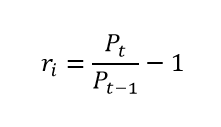

In [219]:
returns = pd.DataFrame()

In [283]:
for tick in tickers:
    returns[tick+'Returns'] = stocks[tick]['Close'].pct_change()

In [284]:
returns.head()

,MGAReturns,GNTXReturns,ADNTReturns,AHKSYReturns,BASFYReturns
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.022799,0.020227,0.007795,0.012041,0.012390
2017-01-05,-0.003090,-0.013056,-0.020282,-0.003966,0.007148
2017-01-06,-0.002435,0.005390,-0.008947,-0.010239,-0.007850
2017-01-09,-0.017310,-0.011696,-0.010798,0.000000,0.003143


## Visualizing the Returns DataFrame using a pairplot from the Seaborn Liabrary 

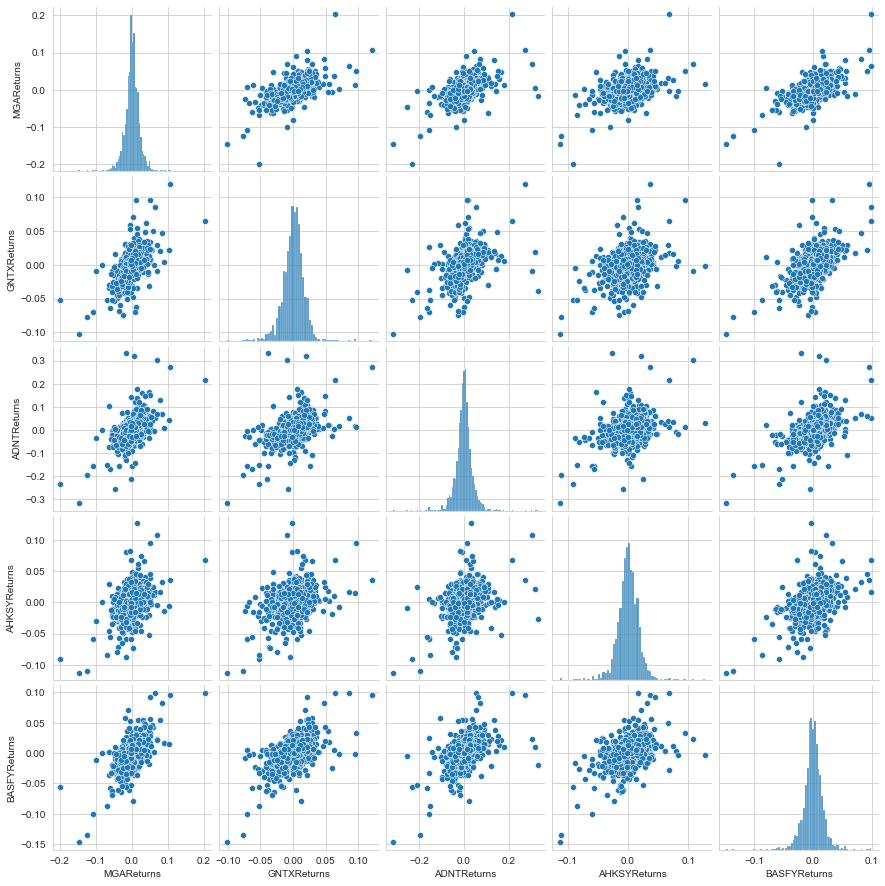

In [222]:
sns.pairplot(returns[1:])

## Using the DataFrame Returns we will investigate which companies stock had the best and worst single day in returns.

In [223]:
returns.idxmin()

MGAReturns     2020-03-18
GNTXReturns    2020-03-16
ADNTReturns    2020-03-16
AHKSYReturns   2020-03-16
BASFYReturns   2020-03-16
dtype: datetime64[ns]

In [224]:
returns.idxmax()

MGAReturns     2020-03-24
GNTXReturns    2020-04-06
ADNTReturns    2020-01-31
AHKSYReturns   2020-08-04
BASFYReturns   2020-03-13
dtype: datetime64[ns]

## What is the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2019?

In [225]:
returns.std()

MGAReturns      0.022255
GNTXReturns     0.017375
ADNTReturns     0.042873
AHKSYReturns    0.018891
BASFYReturns    0.018242
dtype: float64

#### Adient is the riskiest for the entire time period, mind you it was the latest company to go public out of them all... in 2016. 

In [226]:
returns.loc['2019-01-01':'2019-12-31'].std()

MGAReturns      0.015700
GNTXReturns     0.015541
ADNTReturns     0.049088
AHKSYReturns    0.017637
BASFYReturns    0.015776
dtype: float64

#### Adient is the riskiest 

## Visualizing 2019 returns for Magna International Inc (Displot from the Seaboarn Liabrary)

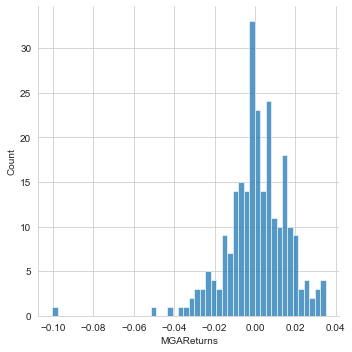

In [296]:
sns.displot(returns['2019-01-01':'2019-12-31']['MGAReturns'], bins = 50)

## Visualizing 2020 returns for Magna International Inc (Displot from the Seaboarn Liabrary)


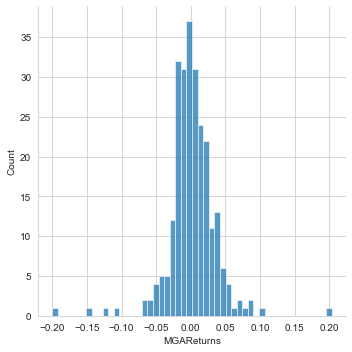

In [300]:
sns.displot(returns['2020-01-01':'2020-12-31']['MGAReturns'], bins = 50)

## Visualizing closing price index for all companies stock from 2017 to today. 

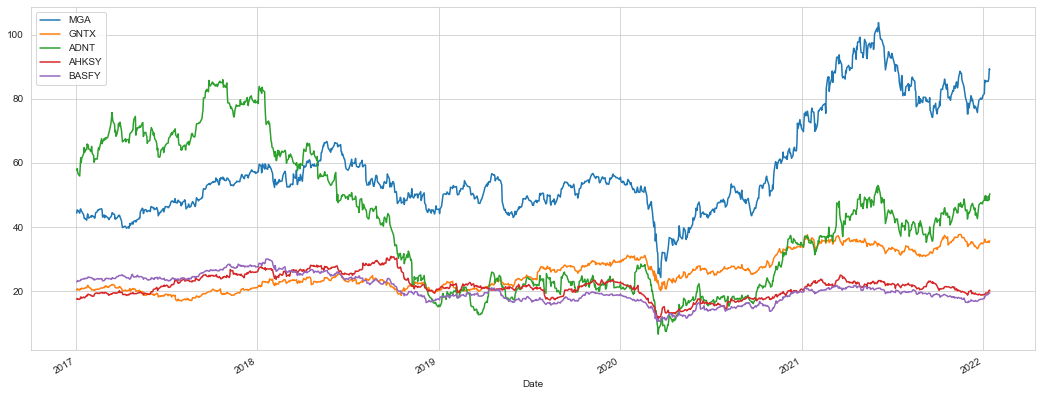

In [240]:
for tick in tickers:
    stocks[tick]['Close'].plot(label=tick, figsize=(18,7))
plt.legend()

## Visualizing the rolling 30 day average agaisnt the Close Price for MGA & ADNT through the years 2018 and 2019

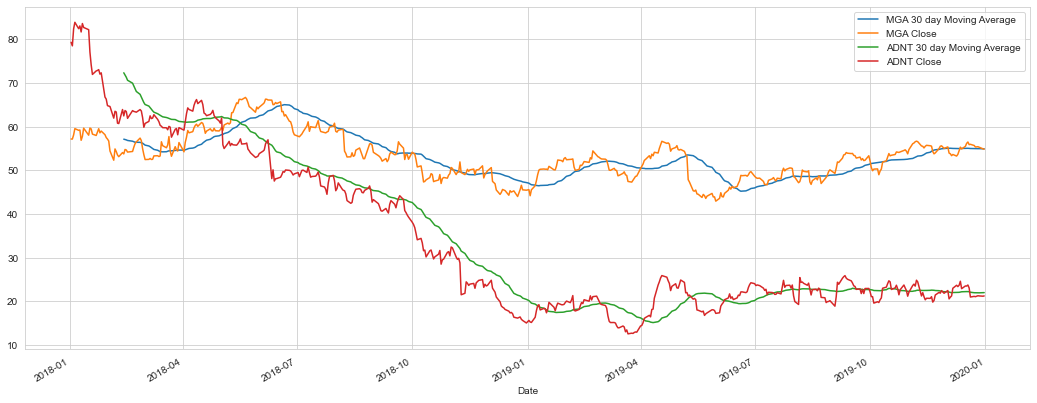

In [287]:
plt.figure(figsize=(18,7))
MGA['Close'].loc['2018-01-01':'2019-12-31'].rolling(window=30).mean().plot(label='MGA 30 day Moving Average')
MGA['Close'].loc['2018-01-01':'2019-12-31'].plot(label='MGA Close')
ADNT['Close'].loc['2018-01-01':'2019-12-31'].rolling(window=30).mean().plot(label='ADNT 30 day Moving Average')
ADNT['Close'].loc['2018-01-01':'2019-12-31'].plot(label='ADNT Close')

plt.legend()

## Visualizing the rolling 30 day average agaisnt the Close Price for AHKSY & BASFY through the years 2018 and 2019

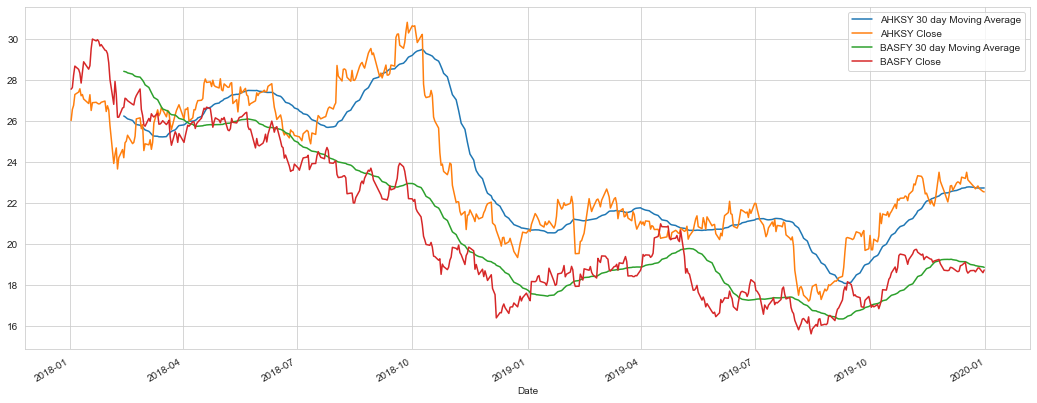

In [288]:
plt.figure(figsize=(18,7))
AHKSY['Close'].loc['2018-01-01':'2019-12-31'].rolling(window=30).mean().plot(label='AHKSY 30 day Moving Average')
AHKSY['Close'].loc['2018-01-01':'2019-12-31'].plot(label='AHKSY Close')
BASFY['Close'].loc['2018-01-01':'2019-12-31'].rolling(window=30).mean().plot(label='BASFY 30 day Moving Average')
BASFY['Close'].loc['2018-01-01':'2019-12-31'].plot(label='BASFY Close')

plt.legend()

## Using a Heatmap to visualize the correlation between the companies stock closing price

<AxesSubplot:xlabel='Stock Ticker', ylabel='Stock Ticker'>

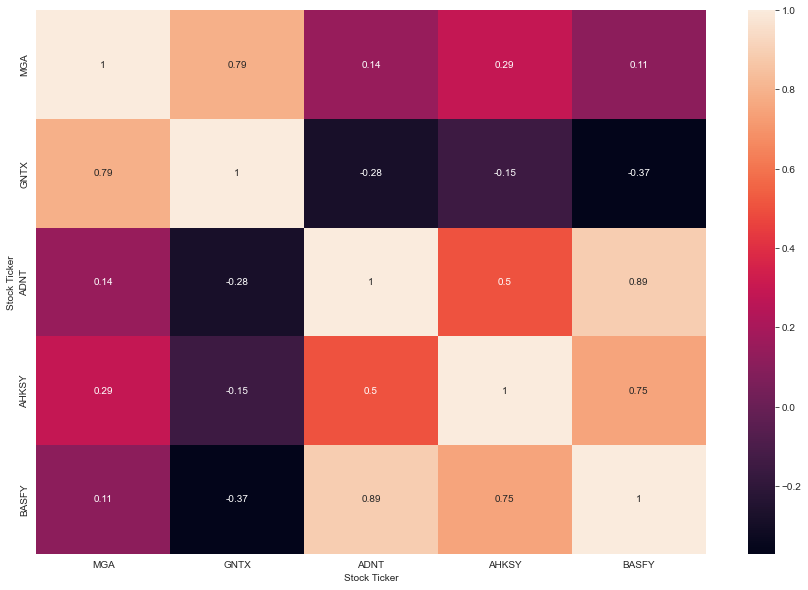

In [270]:
plt.figure(figsize=(15,10))
sns.heatmap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

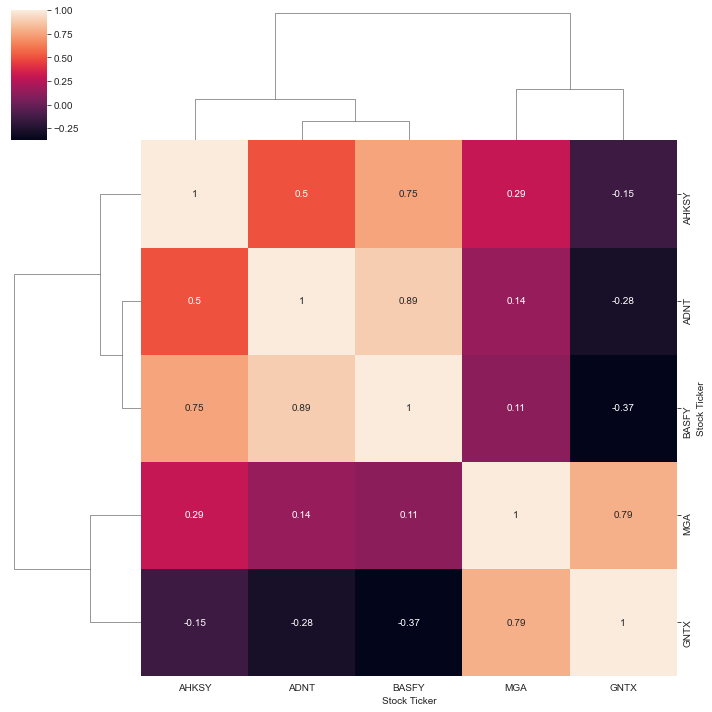

In [271]:
plt.figure(figsize=(15,10))
sns.clustermap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)